In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


pd.set_option('display.max_rows', 23)
pd.set_option('display.max_columns', 25)


In [138]:
df = pd.read_csv('C:/Users/ps3ma/Capstone/Capstone_final - Copy/Actual_Capstone/Capstone_grouped_df.csv')

df

,game_id,winner_play,shotgun,no_huddle,qb_scramble,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,field_goal,pass,run,left,middle,end,guard
0,2009091000,0,40,14,1,1.0,19.0,4.0,10.0,0.0,0.0,1,49,23,21,10,3,9
1,2009091000,1,16,0,0,2.0,13.0,4.0,9.0,0.0,0.0,4,34,25,13,3,6,7
2,2009091300,0,17,0,0,3.0,15.0,6.0,8.0,0.0,0.0,4,38,24,10,10,4,0
3,2009091300,1,21,0,0,4.0,11.0,4.0,7.0,1.0,0.0,0,33,22,14,5,9,0
4,2009091301,0,21,43,7,11.0,20.0,10.0,7.0,1.0,0.0,2,44,41,16,12,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,2018121610,1,35,7,0,7.0,9.0,3.0,7.0,0.0,1.0,1,37,19,5,14,0,6
5048,2018121611,0,47,13,2,5.0,18.0,4.0,8.0,0.0,1.0,3,55,18,21,9,7,3
5049,2018121611,1,56,1,1,7.0,9.0,4.0,9.0,0.0,1.0,4,31,30,8,8,3,1
5050,2018121700,0,45,11,2,5.0,7.0,7.0,8.0,1.0,1.0,0,33,23,6,7,2,6


In [139]:
df.reset_index(inplace=True)
df.set_index('game_id')

,index,winner_play,shotgun,no_huddle,qb_scramble,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,field_goal,pass,run,left,middle,end,guard
game_id,,,,,,,,,,,,,,,,,,
2009091000,0,0,40,14,1,1.0,19.0,4.0,10.0,0.0,0.0,1,49,23,21,10,3,9
2009091000,1,1,16,0,0,2.0,13.0,4.0,9.0,0.0,0.0,4,34,25,13,3,6,7
2009091300,2,0,17,0,0,3.0,15.0,6.0,8.0,0.0,0.0,4,38,24,10,10,4,0
2009091300,3,1,21,0,0,4.0,11.0,4.0,7.0,1.0,0.0,0,33,22,14,5,9,0
2009091301,4,0,21,43,7,11.0,20.0,10.0,7.0,1.0,0.0,2,44,41,16,12,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018121610,5047,1,35,7,0,7.0,9.0,3.0,7.0,0.0,1.0,1,37,19,5,14,0,6
2018121611,5048,0,47,13,2,5.0,18.0,4.0,8.0,0.0,1.0,3,55,18,21,9,7,3
2018121611,5049,1,56,1,1,7.0,9.0,4.0,9.0,0.0,1.0,4,31,30,8,8,3,1


In [140]:
corr_matrix = df.corr()

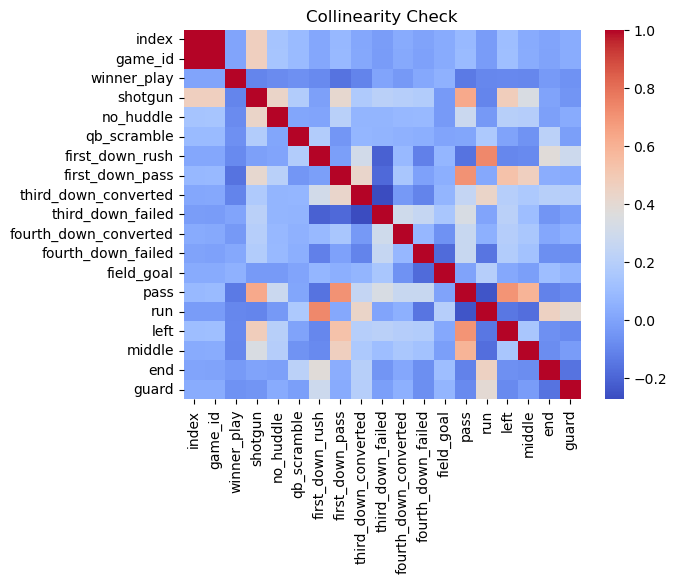

In [141]:
plt.figure()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Collinearity Check');

One last correlation check before modeling. 

----------

### One last visual before modeling

Taking a look at our earlier hypothesis that teams that win often tend to pass more.

In [227]:
pass_vs_run_df = df[['winner_play', 'pass', 'run']]

#### I need to seperate the play calls from both each team and each play type in order to visualize them

In [228]:
pass_vs_run_df['winner_run'] = np.where(pass_vs_run_df['winner_play'] == 1, pass_vs_run_df['run'], 0)
pass_vs_run_df['loser_run'] = np.where(pass_vs_run_df['winner_play'] == 0, pass_vs_run_df['run'], 0)
pass_vs_run_df['winner_pass'] = np.where(pass_vs_run_df['winner_play'] == 1, pass_vs_run_df['pass'], 0)
pass_vs_run_df['loser_pass'] = np.where(pass_vs_run_df['winner_play'] == 0, pass_vs_run_df['pass'], 0)

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_41608\2333721362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_vs_run_df['winner_run'] = np.where(pass_vs_run_df['winner_play'] == 1, pass_vs_run_df['run'], 0)
C:\Users\ps3ma\AppData\Local\Temp\ipykernel_41608\2333721362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_vs_run_df['loser_run'] = np.where(pass_vs_run_df['winner_play'] == 0, pass_vs_run_df['run'], 0)
C:\Users\ps3ma\AppData\Local\Temp\ipykernel_41608\2333721362.py:3: SettingWithCopyW

In [229]:
pass_vs_run_df = pass_vs_run_df.drop(columns = ['winner_play', 'pass', 'run'])

In [230]:
pass_vs_run_df

,winner_run,loser_run,winner_pass,loser_pass
0,0,23,0,49
1,25,0,34,0
2,0,24,0,38
3,22,0,33,0
4,0,41,0,44
...,...,...,...,...
5047,19,0,37,0
5048,0,18,0,55
5049,30,0,31,0
5050,0,23,0,33


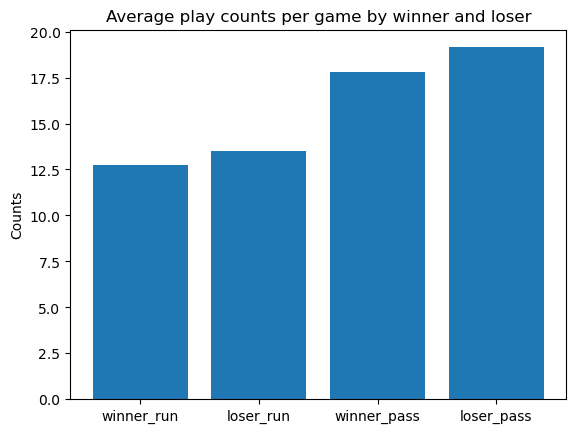

In [231]:
plt.figure()

plt.bar(pass_vs_run_df.columns, pass_vs_run_df.sum()/5052)
plt.ylabel('Counts')
plt.title('Average play counts per game by winner and loser')

plt.show()

Interestingly enough it seems like the losing team tends to call more plays than winning teams, which differs from the origional hypothesis.

---------

In [142]:
x = df.drop(columns = ['winner_play', 'game_id', 'index','third_down_converted','third_down_failed','fourth_down_converted', 'fourth_down_failed'])
y = df['winner_play']
# Dropping additional excess columns while setting the x_values

x_remainder, x_test, y_remainder, y_test = \
    train_test_split(x, y, test_size = 0.2,
                     random_state=5)

Dropping previously missed columns and keeping the rest as x values

Also setting the target to winner_play to measure data for wins and losses

In [143]:
x_train, x_val, y_train, y_val = \
    train_test_split(x_remainder, y_remainder, test_size = 0.3,
                     random_state=5)

Creating a validation set to prevent overfitting on the base training set

In [144]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)

Scaled data for ML models that require scaled data

---------

## Logistic Regression

In [145]:
from sklearn.pipeline import Pipeline

In [146]:
estimators = [('scaler', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

Setting up pipeline to account for potential data leakage.

In [147]:
params = {'model__C':[1, 5, 10, 25, 50, 100]}

gridSearch = GridSearchCV(pipe, params, cv= 5)

fitGrid = gridSearch.fit(x_train,y_train)

Due to needed only 1 primary parameter in 'C' for the grid search, I can search a wide range of values to narrow down my next search. 

Also running a 5 fold cross validation to further attmept to prevent overfitting the model.

In [148]:
gridSearch.best_params_

{'model__C': 1}

The search has returned a best value for 'C' of 5, leaving only 5 interger values left to test to potentially maximize our accuracy.

In [149]:
params = {'model__C':[1, 2]}

gridSearch = GridSearchCV(pipe, params, cv= 5)

fitGrid = gridSearch.fit(x_train,y_train)

In [150]:
gridSearch.best_params_

{'model__C': 0.001}

Finally narrowed down, we find the best 'C' value for the logistic regression model to be 3

----------

In [154]:
logreg = LogisticRegression(C = 1, solver = 'liblinear', random_state = 1)
logreg.fit(x_train,y_train)

LogisticRegression(C=1, random_state=1, solver='liblinear')

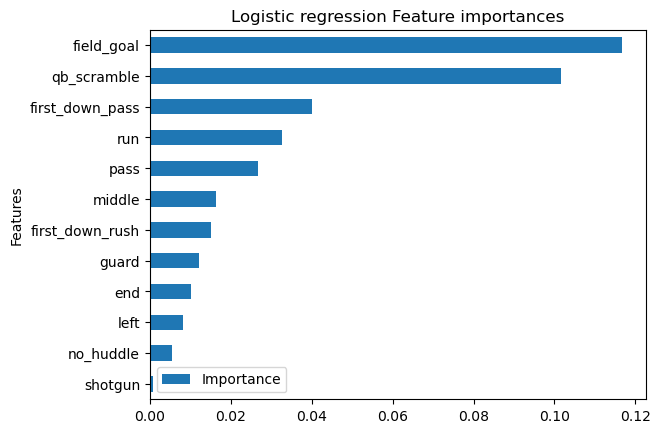

In [155]:
coeffs = logreg.coef_
avg_importance = np.mean(np.abs(coeffs), axis=0)

feature_importance = pd.DataFrame({'Features': x.columns, 'Importance': avg_importance}).sort_values('Importance', ascending=True)
feature_importance.plot(x='Features', y='Importance', kind='barh', title = 'Logistic regression Feature importances');

In our initial model we see field goals and qb rushes as the 2 most indicative features, two that  definitely do not  stand out outside of modeling.

High field goal counts may be indicative of offenses constantly being in scoring position, which is why this may be as important as it is.

QB scambles is much higher than initially believed, this may be due to scrambles leading to big conversions vs man coverage. The teams that run more designed QB runs don't appear to be winning at a higher rate than others from the graphs seen on the previous notebook indicating a much more value in happenstance QB runs than designed scrambles which is interesting.

What does seem significant is that the first down play choice seems to be very telling as both 1st down passes and runs are the next 2 most important features. This will be intersting to see if it continues through the rest of the models as it is the feature most in control by teams.

In [158]:
logreg.score(x_train, y_train)

0.5876944837340877

The model does not appear to be overfit

In [159]:
print(f' The accuracy of the model on the validation set is: {logreg.score(x_val,y_val)}\n The accuracy of the model on the test set is:       {logreg.score(x_test,y_test)}')

 The accuracy of the model on the validation set is: 0.5556471558120363
 The accuracy of the model on the test set is:       0.6013847675568744


Using our optimized 'C' value the initial logistic regression model is able to predict the outcome of a game based on input statistics at around a 57% rate.

For this project the most important model evaluation metric is the total model accuracy, as recall and precision do not provide much value in this case

-------

## Decision Tree

In [160]:
dt_estimators = [('scaler', StandardScaler()),
              ('model', DecisionTreeClassifier())]

dt_pipe = Pipeline(dt_estimators)

Once again creating a pipeline to prevent data leakage

In [161]:
dt_params = {'model': [DecisionTreeClassifier()],
             'model__max_depth': [2,3,4,5,6],
             'model__min_samples_leaf': [2,5,10]}

In [162]:
dt_grid = GridSearchCV(dt_pipe, dt_params, cv = 5, verbose = 3)
dt_grid_fit = dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.549 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.518 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.572 total time=   0.0s
[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.529 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.538 total time=   0.0s
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=5;, score=0.549 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=5;, score=0.518 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=2, model_

[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=10;, score=0.573 total time=   0.0s


In [163]:
dt_grid_fit.best_params_

{'model': DecisionTreeClassifier(max_depth=5, min_samples_leaf=5),
 'model__max_depth': 5,
 'model__min_samples_leaf': 5}

---

In [164]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=5, random_state = 1)
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_val)
dt_val_acc = accuracy_score(y_val,dt_pred)

dt_test_pred = dt.predict(x_test)
dt_test_acc = accuracy_score(y_test,dt_test_pred)

print(f' The accuracy of the model on the validation set is {dt_val_acc}\n The accuracy of the model on the test set is {dt_test_acc}')

 The accuracy of the model on the validation set is 0.5671887881286067
 The accuracy of the model on the test set is 0.5667655786350149


Here we see a weaker score than the logistic regression model, however, with the decision tree there will be more
interpretability.

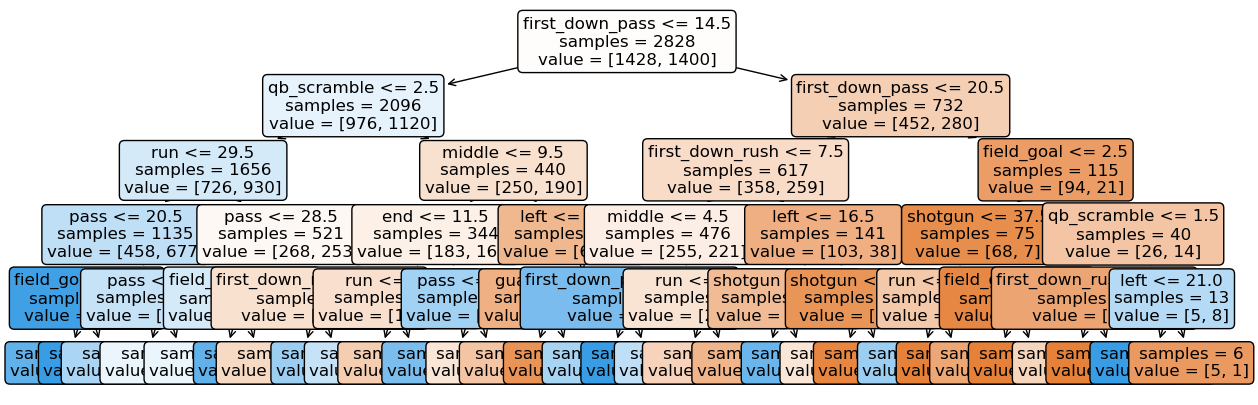

In [165]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,5))


plot_tree(dt, 
          feature_names=x.columns, 
          rounded=True,
          impurity=False,
          filled=True,
          fontsize=12);

As was shown in the logistic regression, the decision tree is also finding first down play choice and QB scrambles as some of the most important features. Meaning there may be some credence to the belief that 1st down play choice is critical to get right from a playcalling perspective.

-------

## XGBoost

In [81]:
import xgboost as xgb
from xgboost import XGBClassifier

In [166]:
xgb_estimators = Pipeline([('scaler', StandardScaler()),
              ('model', XGBClassifier())])

In [167]:
xg_params = {'learning_rate':[.05, .5, 1, 5, 10],
             'max_depth' : [2, 5, 10, 50],
             'n_estimators' : [100, 200, 500]}

gridSearch = GridSearchCV(xgb.XGBClassifier(), param_grid= xg_params, cv= 5, verbose = 3)


xg_fitGrid = gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.604 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.544 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.625 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.561 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.559 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.599 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.541 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.624 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.581 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.5

[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.555 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.569 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.549 total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.531 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.566 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.580 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.544 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.571 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.540 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.563 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=10,

[CV 3/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.574 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.554 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.550 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.530 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.560 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.581 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.547 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.568 total time=   0.2s
[CV 1/5] END learning_rate=5, max_depth=2, n_estimators=100;, score=0.495 total time=   0.0s
[CV 2/5] END learning_rate=5, max_depth=2, n_estimators=100;, score=0.495 total time=   0.0s
[CV 3/5] END learning_rate=5, max_depth=2, n_estimators=100;, 

[CV 4/5] END learning_rate=10, max_depth=5, n_estimators=200;, score=0.504 total time=   0.0s
[CV 5/5] END learning_rate=10, max_depth=5, n_estimators=200;, score=0.496 total time=   0.0s
[CV 1/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.495 total time=   0.0s
[CV 2/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.495 total time=   0.0s
[CV 3/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.505 total time=   0.0s
[CV 4/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.504 total time=   0.0s
[CV 5/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.504 total time=   0.0s
[CV 1/5] END learning_rate=10, max_depth=10, n_estimators=100;, score=0.505 total time=   0.0s
[CV 2/5] END learning_rate=10, max_depth=10, n_estimators=100;, score=0.505 total time=   0.0s
[CV 3/5] END learning_rate=10, max_depth=10, n_estimators=100;, score=0.505 total time=   0.0s
[CV 4/5] END learning_rate=10, max_depth=10, n_estimators

In [168]:
xg_fitGrid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 500}

Now that a wide net has been cast with the GridSearch, there's
still a need to narrow down the optimal values for the
hyperparameters.

In [169]:
xg_params = {'learning_rate':[.0005, .005, .05, .1],
             'max_depth' : [2, 3],
             'n_estimators' : [350, 400, 450, 500, 550]}

gridSearch = GridSearchCV(xgb.XGBClassifier(), param_grid= xg_params, cv= 5, verbose = 3)

xg_fitGrid = gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=350;, score=0.564 total time=   0.0s
[CV 2/5] END learning_rate=0.0005, max_depth=2, n_estimators=350;, score=0.518 total time=   0.0s
[CV 3/5] END learning_rate=0.0005, max_depth=2, n_estimators=350;, score=0.583 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=2, n_estimators=350;, score=0.549 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=2, n_estimators=350;, score=0.559 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=400;, score=0.562 total time=   0.0s
[CV 2/5] END learning_rate=0.0005, max_depth=2, n_estimators=400;, score=0.518 total time=   0.0s
[CV 3/5] END learning_rate=0.0005, max_depth=2, n_estimators=400;, score=0.587 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=2, n_estimators=400;, score=0.552 total time=   0.1s
[CV 5/5] END learning_rate=0.0005, max_depth=2, n_estima

[CV 1/5] END learning_rate=0.005, max_depth=3, n_estimators=450;, score=0.601 total time=   0.1s
[CV 2/5] END learning_rate=0.005, max_depth=3, n_estimators=450;, score=0.546 total time=   0.1s
[CV 3/5] END learning_rate=0.005, max_depth=3, n_estimators=450;, score=0.624 total time=   0.1s
[CV 4/5] END learning_rate=0.005, max_depth=3, n_estimators=450;, score=0.586 total time=   0.1s
[CV 5/5] END learning_rate=0.005, max_depth=3, n_estimators=450;, score=0.582 total time=   0.1s
[CV 1/5] END learning_rate=0.005, max_depth=3, n_estimators=500;, score=0.599 total time=   0.1s
[CV 2/5] END learning_rate=0.005, max_depth=3, n_estimators=500;, score=0.537 total time=   0.1s
[CV 3/5] END learning_rate=0.005, max_depth=3, n_estimators=500;, score=0.629 total time=   0.1s
[CV 4/5] END learning_rate=0.005, max_depth=3, n_estimators=500;, score=0.586 total time=   0.1s
[CV 5/5] END learning_rate=0.005, max_depth=3, n_estimators=500;, score=0.575 total time=   0.1s
[CV 1/5] END learning_rate=0.0

[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=550;, score=0.544 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=550;, score=0.610 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=550;, score=0.566 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=550;, score=0.584 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=350;, score=0.560 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=350;, score=0.562 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=350;, score=0.601 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=350;, score=0.559 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=350;, score=0.575 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=400;, score=0.558 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_est

In [170]:
xg_fitGrid.best_params_

{'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 450}

These numbers can still be narrowed down further, to get optimal results,
however, the max depth is currently set.

In [171]:
xg_params = {'learning_rate':[.0005, .005, .001],
             'max_depth':[3],
             'n_estimators' : [425, 450, 475]}

gridSearch = GridSearchCV(xgb.XGBClassifier(), param_grid= xg_params, cv= 5, verbose = 3)

xg_fitGrid = gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.0005, max_depth=3, n_estimators=425;, score=0.572 total time=   0.1s
[CV 2/5] END learning_rate=0.0005, max_depth=3, n_estimators=425;, score=0.544 total time=   0.1s
[CV 3/5] END learning_rate=0.0005, max_depth=3, n_estimators=425;, score=0.606 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=3, n_estimators=425;, score=0.552 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=3, n_estimators=425;, score=0.566 total time=   0.1s
[CV 1/5] END learning_rate=0.0005, max_depth=3, n_estimators=450;, score=0.574 total time=   0.1s
[CV 2/5] END learning_rate=0.0005, max_depth=3, n_estimators=450;, score=0.544 total time=   0.1s
[CV 3/5] END learning_rate=0.0005, max_depth=3, n_estimators=450;, score=0.608 total time=   0.1s
[CV 4/5] END learning_rate=0.0005, max_depth=3, n_estimators=450;, score=0.552 total time=   0.1s
[CV 5/5] END learning_rate=0.0005, max_depth=3, n_estimato

In [172]:
xg_fitGrid.best_params_

{'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 450}

In [173]:
xg_params = {'objective':'binary:logistic',
             'learning_rate': .005,
             'max_depth': 3,
             'n_estimators': 450,
             'seed': 1}

boost_train = xgb.DMatrix(x_train,label = y_train)
xg_model = xgb.train(xg_params,boost_train)

[17:11:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [174]:
xg_val = xgb.DMatrix(x_val)
xg_pred = xg_model.predict(xg_val)

In [175]:
xg_test = xgb.DMatrix(x_test)
xg_test_pred = xg_model.predict(xg_test)

In [176]:
accuracy = accuracy_score(y_val, xg_pred.round())
xg_test_acc = accuracy_score(y_test,xg_test_pred.round())

--------

In [177]:
print(f' The accuracy of the model on the validation set i: {accuracy}\n The accuracy of the model on the test set is:      {xg_test_acc}')

 The accuracy of the model on the validation set i: 0.5597691673536686
 The accuracy of the model on the test set is:      0.5558852621167161


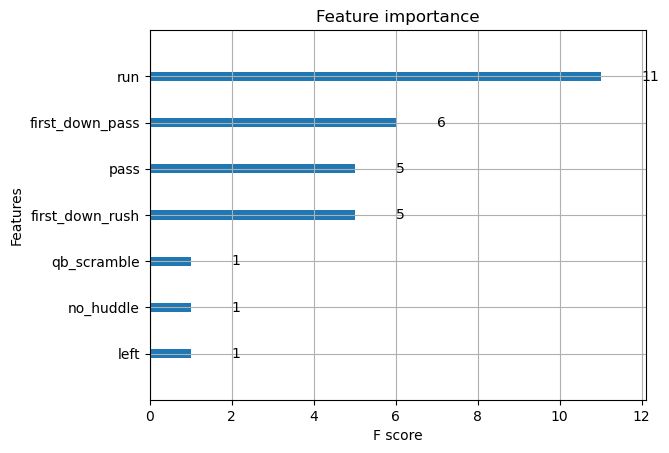

In [94]:
xgb.plot_importance(xg_model)
plt.show()

Now in the final model we once again see that first down play choice is one of the most influential features for the model. Seemingly confirming the hypothesis formed after viewing the first model. One thing that was also consistent across all models is that first down passes were more important than 1st down runs and if there are any takeaways by this point it's that passing on first down is an optimal strategy.

In [178]:
print(f'The final accuracy of the Logistic Regression model is: {logreg.score(x_test,y_test)}\nThe final accuracy of the Decision Tree model is:       {dt_test_acc}\nThe final accuracy of the XGBoost model is:             {xg_test_acc}')

The final accuracy of the Logistic Regression model is: 0.6013847675568744
The final accuracy of the Decision Tree model is:       0.5667655786350149
The final accuracy of the XGBoost model is:             0.5558852621167161


After using a logistic regression, decision tree and xgboost model the overall scores are all below 60%. This provides
valuable data to utilize when making decisions, however, it is not enough to make 100% claims like making
a "decision A" is always correct. That being said, there does seem to be value in passing on 1st down more than running and it is something worth looking into some more.